In [1]:
from glob import glob
import random
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

Using TensorFlow backend.


# Load Dataset

In [3]:
CATS_DIR = '/home/awais/MyProjects/CatsandDogs/datasets/cats/*'
DOGS_DIR = '/home/awais/MyProjects/CatsandDogs/datasets/dogs/*'

In [4]:
cats_paths = glob(CATS_DIR)
dogs_paths = glob(DOGS_DIR)

# cats = 1
# dogs = 2

labels =  []

In [5]:
ROWS = 64
COLS = 64
CHANNELS = 1
NUM_CLASSES = 2

batch_size = 80
epochs = 40

In [6]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img.reshape(ROWS, COLS, CHANNELS)

In [7]:
data = []

for i, image_file in enumerate(cats_paths):
    image = read_image(image_file)
    data.append(image)
    labels.append(0)
    
for i, image_file in enumerate(dogs_paths):
    image = read_image(image_file)
    data.append(image)
    labels.append(1)

In [8]:
len(data)

25000

In [9]:
len(labels)

25000

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=48)

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

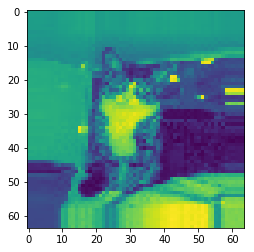

In [12]:
plt.imshow(X_train[0].reshape(64,64))

In [13]:
X_train = X_train /255
X_test = X_test/ 255

# Create Model

In [14]:

model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=32,input_shape=(ROWS, COLS,1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(5,5),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=64))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          16448     
__________

In [16]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [17]:
learning_rate = 1e-4
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Train the model

In [18]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard])

Train on 17500 samples, validate on 7500 samples
Epoch 1/40
17500/17500 [==============================] - 356s 20ms/step - loss: 0.6776 - acc: 0.5611 - val_loss: 0.6738 - val_acc: 0.5911
Epoch 2/40
17500/17500 [==============================] - 351s 20ms/step - loss: 0.6220 - acc: 0.6503 - val_loss: 0.5860 - val_acc: 0.6808
Epoch 3/40
17500/17500 [==============================] - 352s 20ms/step - loss: 0.5605 - acc: 0.7090 - val_loss: 0.5312 - val_acc: 0.7320
Epoch 4/40
17500/17500 [==============================] - 352s 20ms/step - loss: 0.5018 - acc: 0.7532 - val_loss: 0.5080 - val_acc: 0.7491
Epoch 5/40
17500/17500 [==============================] - 350s 20ms/step - loss: 0.4481 - acc: 0.7839 - val_loss: 0.4785 - val_acc: 0.7572
Epoch 6/40
17500/17500 [==============================] - 349s 20ms/step - loss: 0.3904 - acc: 0.8177 - val_loss: 0.4873 - val_acc: 0.7667
Epoch 7/40
17500/17500 [==============================] - 350s 20ms/step - loss: 0.3439 - acc: 0.8424 - val_loss: 0.4

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])